In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df=pd.read_excel("C:/Users/ADMIN/Downloads/financial_loan.xlsx")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

In [5]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

### Metadata of data

In [7]:
print("No.of Rows:", df.shape[0])

No.of Rows: 38576


In [8]:
print("No.of Columns:", df.shape[1])

No.of Columns: 24


### Total Loan Application

In [10]:
total_loan_application= df['id'].count()
print('Total Loan Applications:',total_loan_application)

Total Loan Applications: 38576


### MTD Total Loan Application

In [12]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_application = mtd_data['id'].count()

print(f'MTD Loan Applications (for {latest_issue_date.strftime('%B, %Y')}):{mtd_loan_application}')

MTD Loan Applications (for December, 2021):4314


## Total Funded Amount

In [14]:
total_funded_amt = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amt/1000000
print('Total Funded Amount: ${:.2f}M'.format(total_funded_amount_millions))

Total Funded Amount: $435.76M


## MTD Funded Amount 

In [16]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount=mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions=mtd_total_funded_amount/1000000
print('MTD Loan Funded Amount: ${:.2f}M'. format(mtd_total_funded_amount_millions))

MTD Loan Funded Amount: $53.98M


## Total Amount Received

In [18]:
total_amount_received=df['total_payment'].sum()
total_amount_received_millions=total_amount_received/1000000
print('Total Amount Received: {:.2f}M'.format(total_amount_received_millions))

Total Amount Received: 473.07M


## MTD Amount Received

In [20]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_amount_received = mtd_data['total_payment'].sum()
mtd_amount_received_millions= mtd_amount_received/1000000
print('MTD Amount Received: {:.2f}M'.format(mtd_amount_received_millions))

MTD Amount Received: 58.07M


## Avg Interest Rate

In [22]:
avg_interest_rate=df['int_rate'].mean() *100
print('Avg Interest Rate: {:.2f}%'.format(avg_interest_rate))

Avg Interest Rate: 12.05%


## Avg Debt to Income Ratio

In [24]:
avg_debt_income_ratio = df['dti'].mean()*100
print('Avg DTI: {:.2f}%'.format(avg_debt_income_ratio))

Avg DTI: 13.33%


# Good Loan Metrics

In [26]:
good_loan=df[df['loan_status'].isin(['Fully Paid','Current'])]
total_loan_application = df['id'].count()

good_loan_application = good_loan['id'].count()
good_loan_funded_amt= good_loan['loan_amount'].sum()
good_loan_recieved_amt = good_loan['total_payment'].sum()

good_loan_funded_amt_millions = good_loan_funded_amt/1000000
good_loan_received_amt_millions=good_loan_recieved_amt/1000000

good_loan_percentage = (good_loan_application/total_loan_application) * 100

print('Good Loan Percentage:', good_loan_percentage)
print('Good Loan Applications:',good_loan_application)
print('Good Loan Funded Amt: ${:.2f}M'.format(good_loan_funded_amt_millions))
print('Good Loan Received Amt: ${:.2f}M'.format(good_loan_received_amt_millions))

Good Loan Percentage: 86.17534218166736
Good Loan Applications: 33243
Good Loan Funded Amt: $370.22M
Good Loan Received Amt: $435.79M


# Bad Loan Metrics

In [28]:
bad_loan_amt = df[df['loan_status'].isin(['Charged Off'])]
total_loan_application = df['id'].count()

bad_loan_application = bad_loan_amt['id'].count()
bad_loan_funded_amount = bad_loan_amt['loan_amount'].sum()
bad_loan_received_amount = bad_loan_amt['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_received_amount_millions = bad_loan_received_amount/1000000

bad_loan_percentage = (bad_loan_application/total_loan_application)*100

print('Total Loan Application:',bad_loan_application)
print('Bad Loan Funded Amount: ${:.2f}M'.format(bad_loan_funded_amount_millions))
print('Bad Loan Received Amount: ${:.2f}M'.format(bad_loan_received_amount_millions))
print('Bad Loan Percentage: {:.2f}%'.format(bad_loan_percentage))

Total Loan Application: 5333
Bad Loan Funded Amount: $65.53M
Bad Loan Received Amount: $37.28M
Bad Loan Percentage: 13.82%


# Monthly Trend by Issue Date for Total Funded Amount

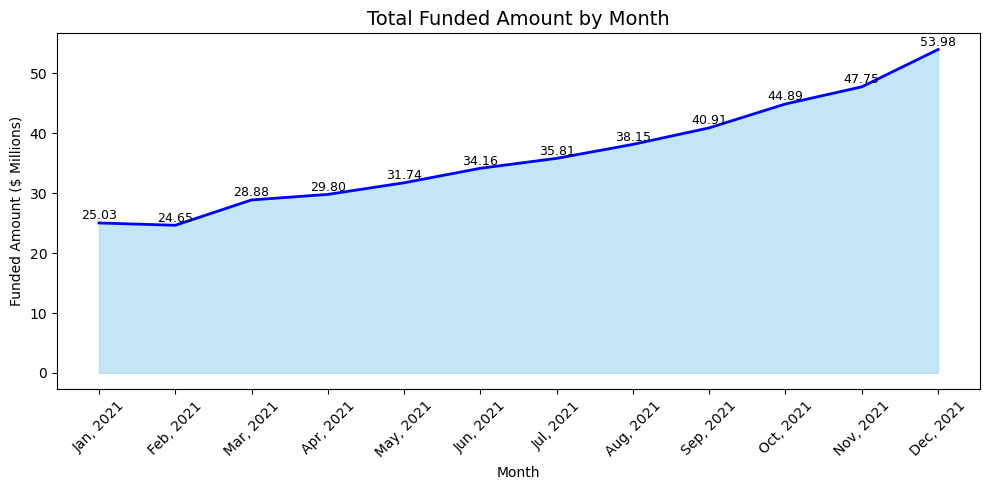

In [30]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b, %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'],color='blue',linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions']+ 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center',va='bottom',fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'],rotation=45)
plt.tight_layout()
plt.show()

# Monthly Trend by Issue Date for Total Amount Received

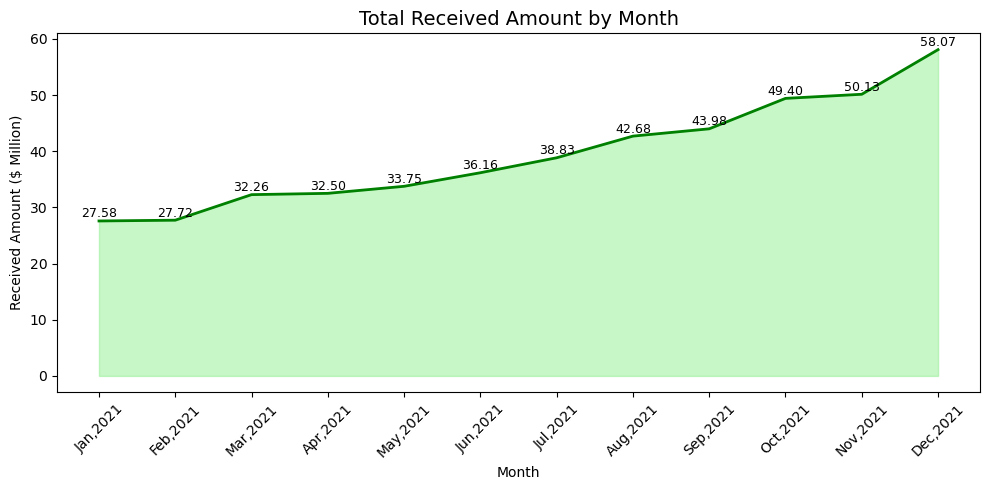

In [32]:
monthly_received= (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b,%Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'], color='lightgreen',alpha=0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color='green',linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i,row['received_amount_millions']+0.1, f"{row['received_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Million)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.tight_layout()
plt.show()

# Monthly Trend by Issue Date for Total Loan Application

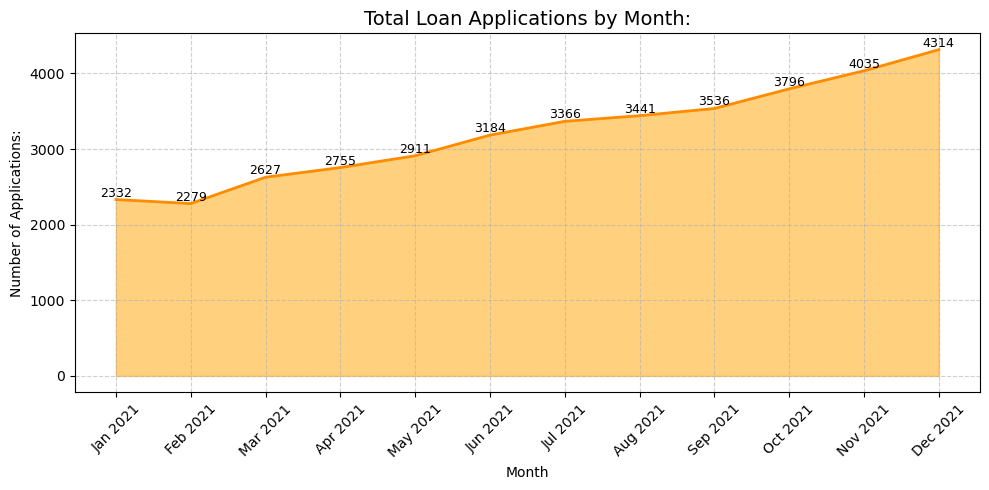

In [34]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='total_loan_application')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'],monthly_applications['total_loan_application'],
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'],monthly_applications['total_loan_application'], color='darkorange', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['total_loan_application'] +0.1, f"{row['total_loan_application']}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Loan Applications by Month:', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications:')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
           
    

# Regional Analysis by State for Total Funded Amount

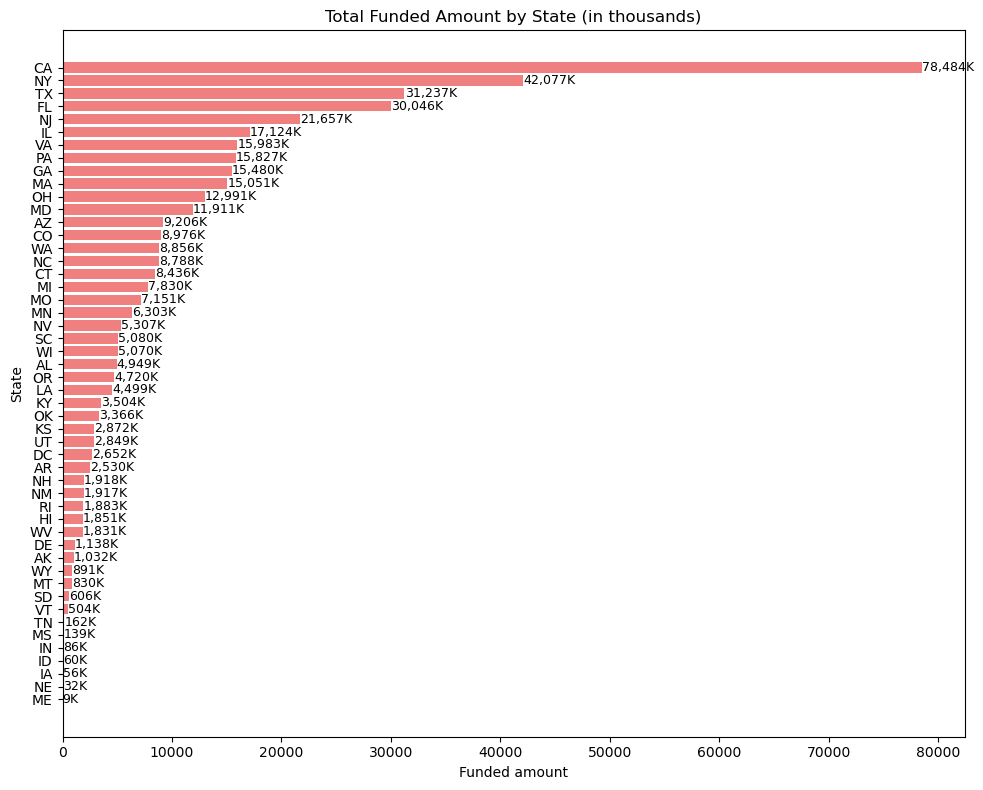

In [36]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands=state_funding/1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in thousands)')
plt.xlabel('Funded amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Regional Analysis by State for Total Received Amount

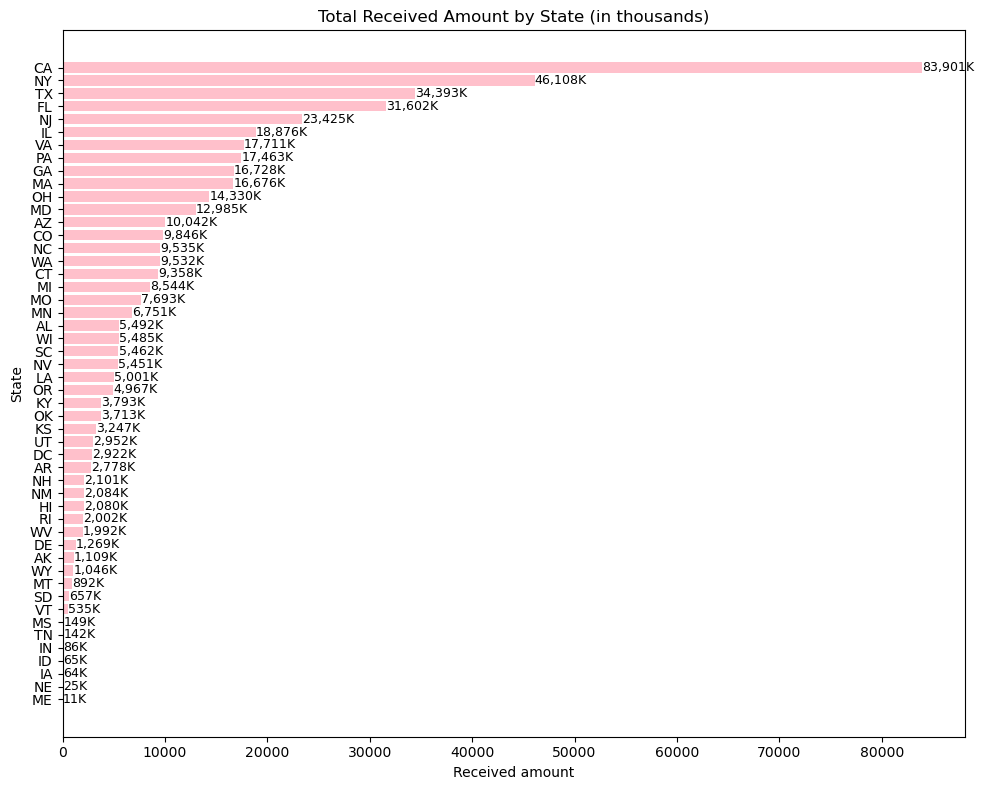

In [38]:
state_received_amt=df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_amt_thousands= state_received_amt/1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_received_amt_thousands.index,state_received_amt_thousands.values, color='pink')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Received Amount by State (in thousands)')
plt.xlabel('Received amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Regional Analysis by State for Total Loan Application

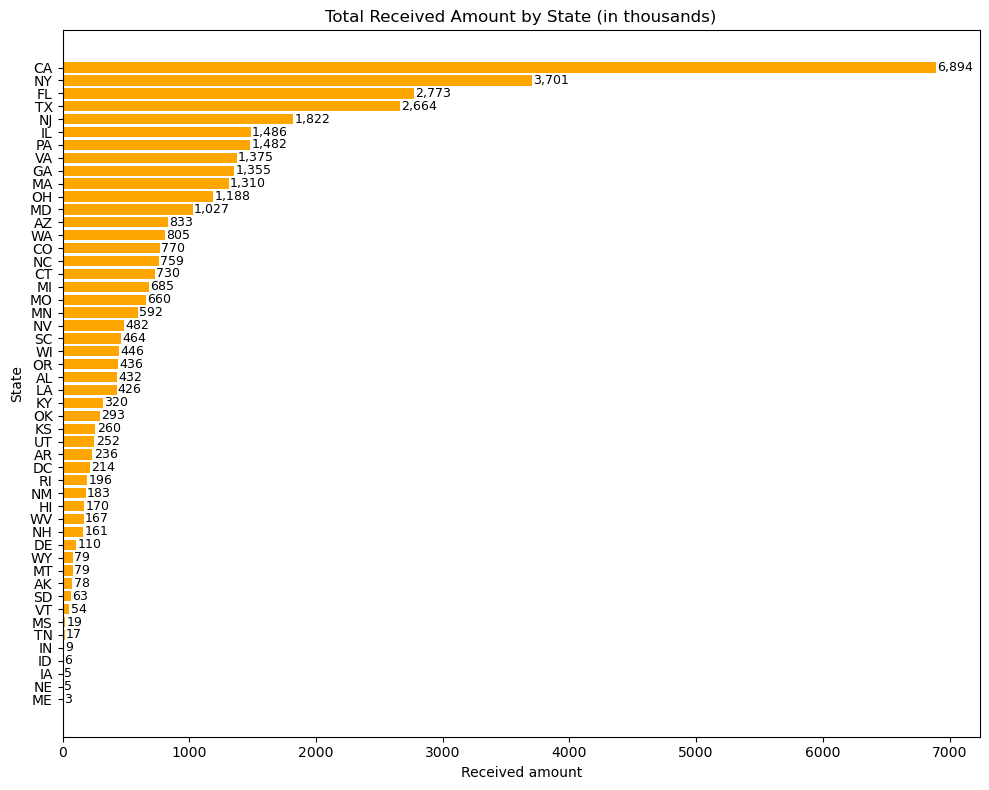

In [40]:
state_application = df.groupby('address_state')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10,8))
bars=plt.barh(state_application.index, state_application.values, color='orange')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f'{width:,.0f}', va='center', fontsize=9)

plt.title('Total Received Amount by State (in thousands)')
plt.xlabel('Received amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Loan Term Analysis by Total funded Amount

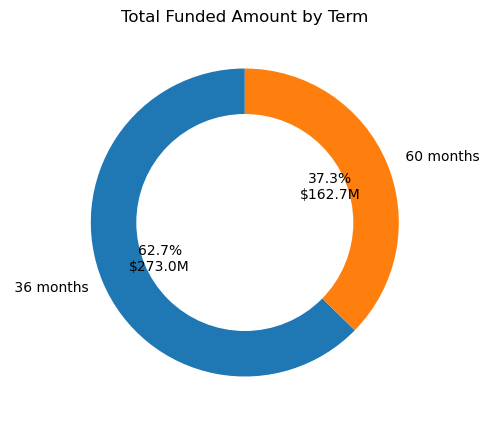

In [66]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels = term_funding_millions.index,
    autopct= lambda p: f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle=90,
    wedgeprops = {'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title('Total Funded Amount by Term')
plt.show()

    

# Loan Term Analysis by Total Received Amount

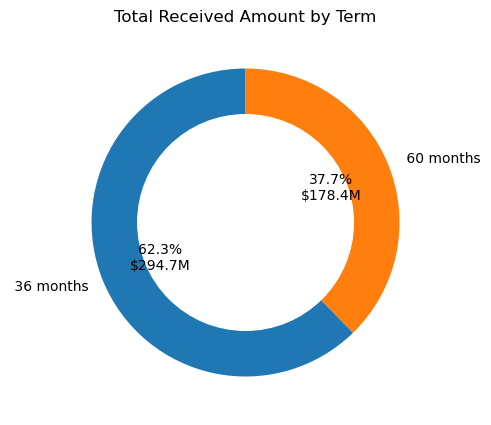

In [87]:
term_received_amount_millions = df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_received_amount_millions,
    labels = term_received_amount_millions.index,
    autopct= lambda p: f'{p:.1f}%\n${p*sum(term_received_amount_millions)/100:.1f}M',
    startangle=90
)
plt.gca().add_artist(plt.Circle((0,0),0.70, color='white'))
plt.title('Total Received Amount by Term')
plt.show()

# Loan Term Analysis by Total Loan Application

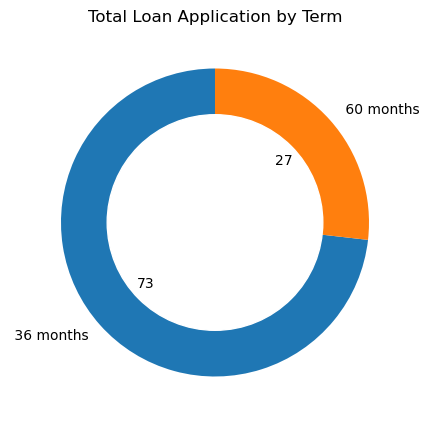

In [96]:
term_application = df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))
plt.pie(
    term_application,
    labels = term_application.index,
    autopct = lambda p: f'{p:.0f}',
    startangle=90
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title('Total Loan Application by Term')
plt.show()

# Employee Length by Total Funded Amount

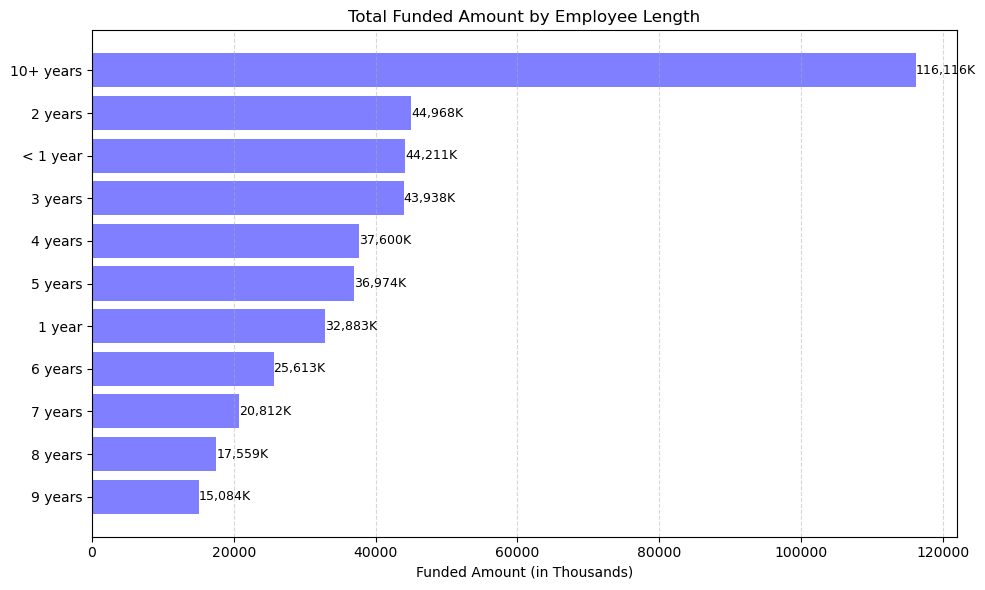

In [112]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='blue', alpha=0.5)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.xlabel('Funded Amount (in Thousands)')
plt.title('Total Funded Amount by Employee Length')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

# Employee Length by Total Received amount

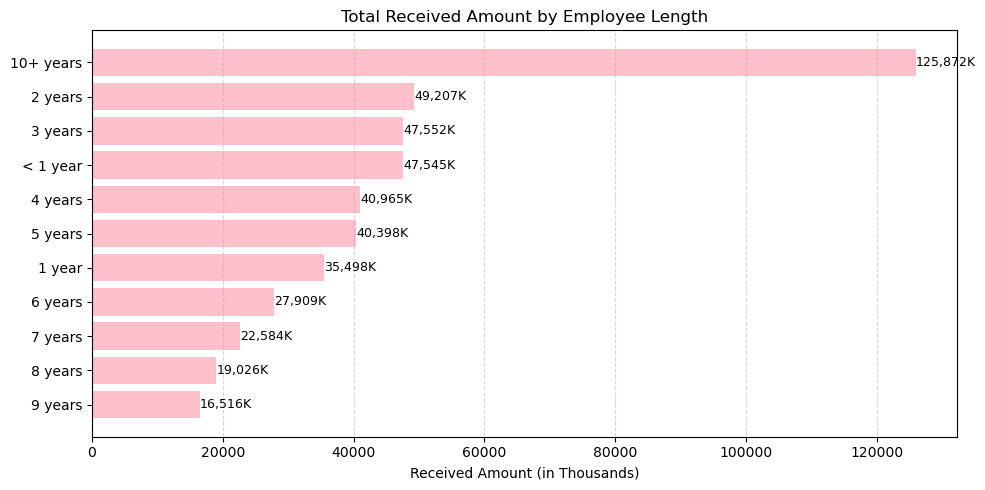

In [110]:
emp_received = df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize=(10,5))
bars = plt.barh(emp_received.index, emp_received.values, color='pink')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}K', va='center',fontsize=9)

plt.xlabel('Received Amount (in Thousands)')
plt.title('Total Received Amount by Employee Length')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

# Employee Length by Total Loan Application

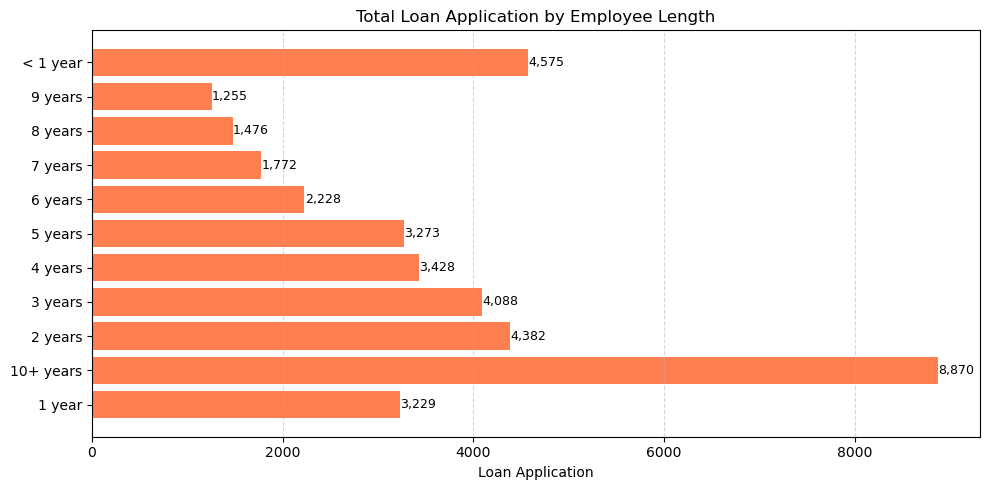

In [119]:
emp_appl = df.groupby('emp_length')['id'].count()

plt.figure(figsize=(10,5))
bars = plt.barh(emp_appl.index, emp_appl.values, color='coral')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}', va='center', fontsize=9)

plt.xlabel('Loan Application')
plt.title('Total Loan Application by Employee Length')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

# Loan Purpose breakdown by Total Funded Amount

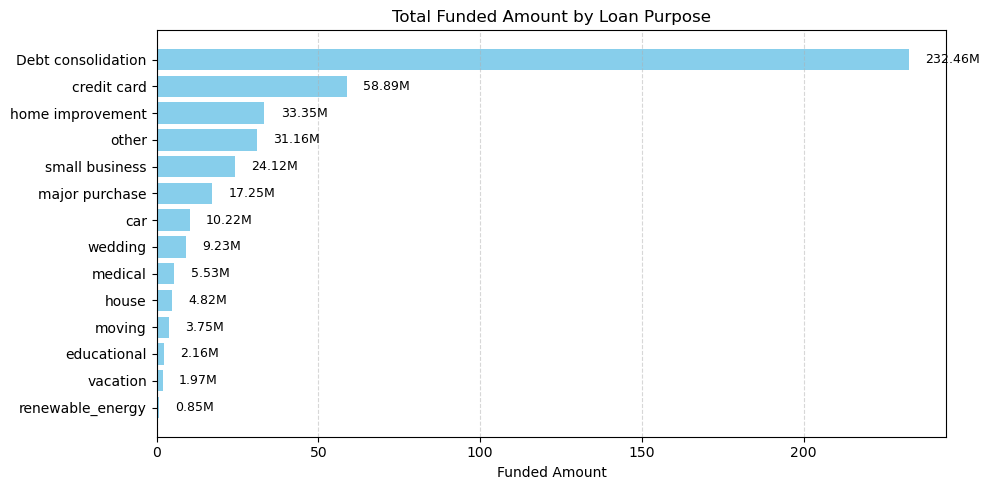

In [134]:
funded_purpose = df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize=(10,5))
bars = plt.barh(funded_purpose.index, funded_purpose.values,color='skyblue')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}M', va='center', fontsize=9)

plt.xlabel('Funded Amount')
plt.title('Total Funded Amount by Loan Purpose')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

# Loan Purpose breakdown by Total Received Amount

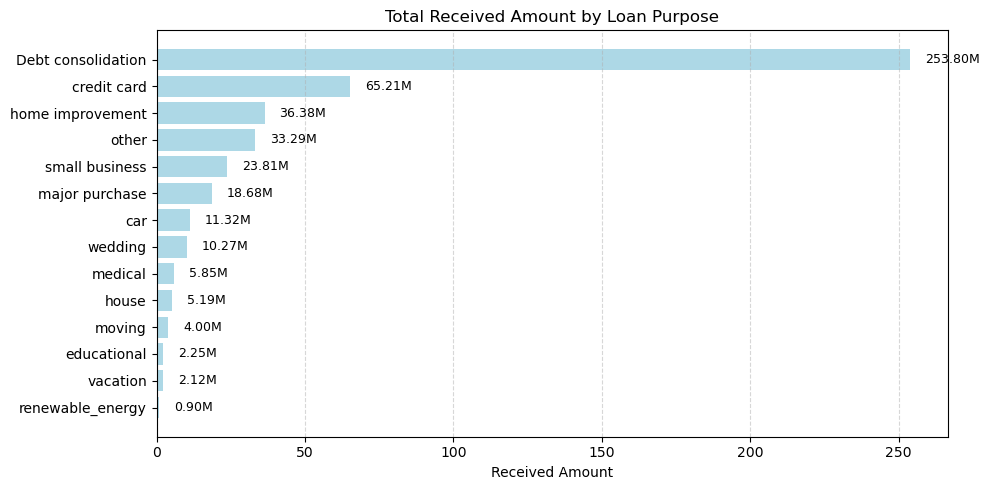

In [144]:
received_purpose = df.groupby('purpose')['total_payment'].sum().sort_values()/1000000

plt.figure(figsize=(10,5))
bars=plt.barh(received_purpose.index, received_purpose.values, color='lightblue')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}M', va='center', fontsize=9)

plt.xlabel('Received Amount')
plt.title('Total Received Amount by Loan Purpose')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

# Loan Purpose breakdown by Total Loan Application

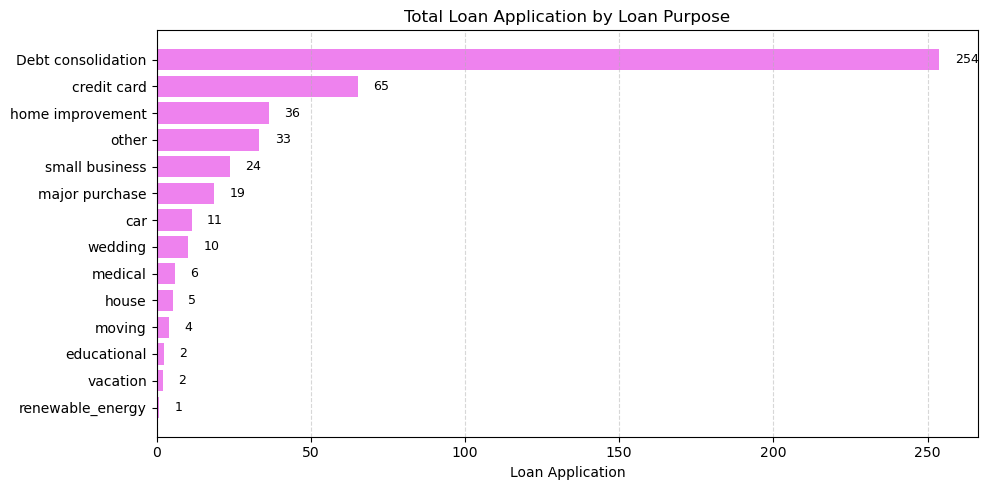

In [150]:
application_purpose = df.groupby('purpose')['total_payment'].count()

plt.figure(figsize=(10,5))
bars=plt.barh(received_purpose.index, received_purpose.values, color='violet')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:.0f}', va='center', fontsize=9)

plt.xlabel('Loan Application')
plt.title('Total Loan Application by Loan Purpose')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

# Home Ownership by Total Funded Amount

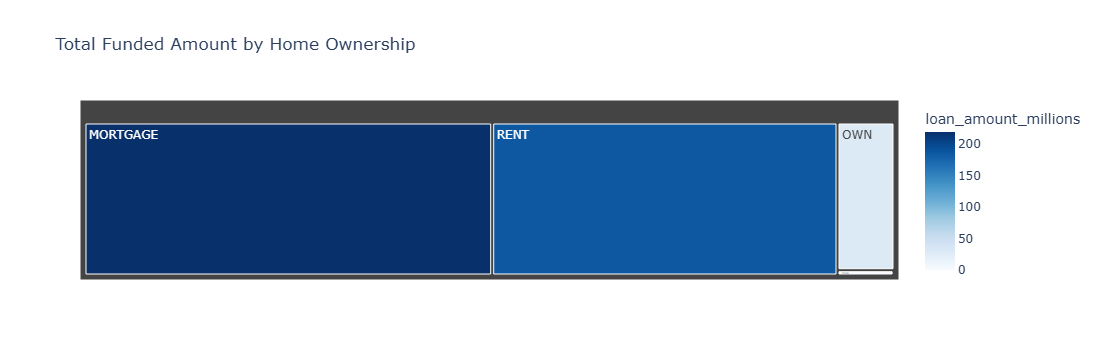

In [174]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']= home_funding['loan_amount']/1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership'
)

fig.show()
    

# Home Ownership by Total Received Amount

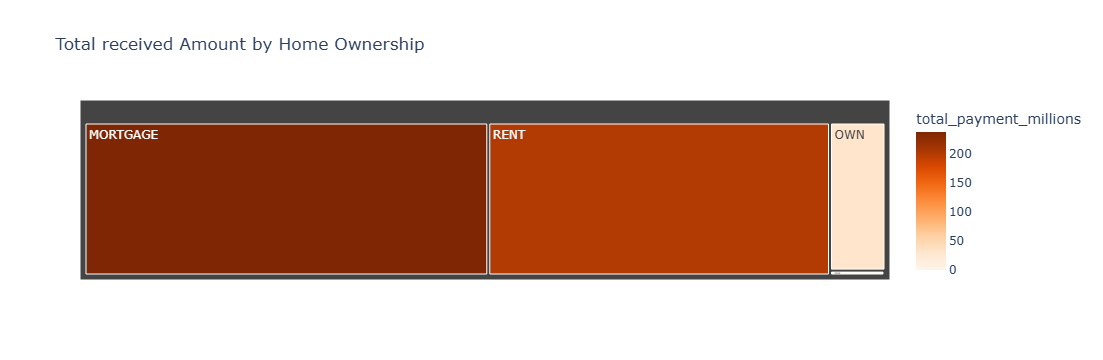

In [187]:
home_receiving = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_receiving['total_payment_millions']=home_receiving['total_payment']/1000000

fig = px.treemap(
    home_receiving,
    path=['home_ownership'],
    values='total_payment_millions',
    color='total_payment_millions',
    color_continuous_scale='oranges',
    title='Total received Amount by Home Ownership'
)

fig.show()

# Home Ownership by Total Loan Application

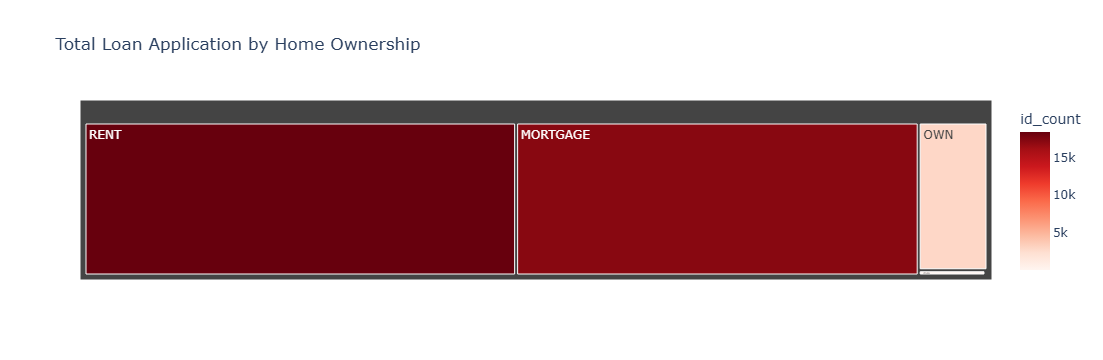

In [204]:
home_application = df.groupby('home_ownership')['id'].count().reset_index()
home_application['id_count']=home_application['id']

fig = px.treemap(
    home_application,
    path=['home_ownership'],
    values='id_count',
    color='id_count',
    color_continuous_scale='reds',
    title='Total Loan Application by Home Ownership'
)

fig.show()